In [12]:
from keras.applications import vgg16
from keras.models import Model
import keras
import matplotlib.pyplot as plt

In [4]:
input_shape = (150,150,3)

In [6]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet',
                 input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layers in vgg_model.layers:
    layers.trainable = False
    
vgg_model.summary()


58892288/58889256 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [7]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) 
          for layer in vgg_model.layers]

pd.DataFrame(layers, columns = ['Layer Type', 'Layer Name', 'Layer Trainable'])


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fad4f656790>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad4eb36350>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad4d94ccd0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fad4d943090>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad4d93be90>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad4ca9f250>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fad4c344210>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad4c338510>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad4c34b050>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad4cae47d0>,block3_conv3,False


In [9]:
%store -r train_imgs_scaled


In [15]:
%store -r validation_imgs_scaled

[[[[0.         0.         0.         ... 0.         0.8656103
    0.        ]
   [0.         0.         0.         ... 0.         0.45623726
    0.        ]
   [0.5135511  0.         0.4104628  ... 0.         0.
    0.        ]
   [0.97061396 0.         0.28073192 ... 0.         0.34782267
    0.        ]]

  [[0.         0.         0.         ... 0.         1.1298417
    0.        ]
   [0.         0.         0.31726855 ... 0.17607243 0.7319436
    0.        ]
   [1.0402734  0.         0.98363    ... 0.38952196 0.
    0.        ]
   [1.1919419  0.         0.561596   ... 0.5268876  0.24319974
    0.        ]]

  [[0.0495993  0.         0.         ... 0.         1.0270705
    0.        ]
   [0.11192551 0.         0.73628056 ... 0.1861231  0.6111111
    0.        ]
   [0.6164263  0.         0.9319964  ... 0.         0.
    0.05961056]
   [0.8183955  0.         0.7838482  ... 0.02603566 0.45731017
    0.        ]]

  [[0.18865839 0.         0.         ... 0.         0.7205793
    0.       

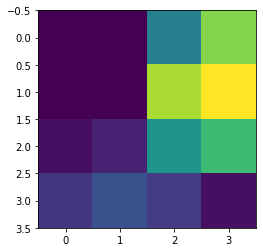

In [13]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [14]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features


In [16]:
train_features_vgg = get_bottleneck_features(vgg_model, 
                                             train_imgs_scaled)

validation_features_vgg = get_bottleneck_features(vgg_model,
                                                 validation_imgs_scaled)

In [17]:
print('Train Bottleneck Features:', train_features_vgg.shape, 
     '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (2930, 8192) 	Validation Bottleneck Features: (993, 8192)


In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

In [24]:
input_shape = vgg_model.output_shape[1]
model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss= 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics='accuracy')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [29]:
%store -r train_labels_enc

In [32]:
%store -r validation_labels_enc

In [33]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                   validation_data = (validation_features_vgg, validation_labels_enc),
                   batch_size=30, epochs=50, verbose=1)

Epoch 1/50
98/98 [==============================] - 5s 38ms/step - loss: 0.5454 - accuracy: 0.7276 - val_loss: 0.4785 - val_accuracy: 0.7674
Epoch 2/50
98/98 [==============================] - 3s 34ms/step - loss: 0.3298 - accuracy: 0.8482 - val_loss: 0.2477 - val_accuracy: 0.9074
Epoch 3/50
98/98 [==============================] - 3s 36ms/step - loss: 0.2297 - accuracy: 0.9010 - val_loss: 0.2323 - val_accuracy: 0.9043
Epoch 4/50
98/98 [==============================] - 4s 38ms/step - loss: 0.2134 - accuracy: 0.9103 - val_loss: 0.2419 - val_accuracy: 0.8963
Epoch 5/50
98/98 [==============================] - 4s 36ms/step - loss: 0.1677 - accuracy: 0.9352 - val_loss: 0.2719 - val_accuracy: 0.8902
Epoch 6/50
98/98 [==============================] - 4s 37ms/step - loss: 0.1525 - accuracy: 0.9374 - val_loss: 0.2627 - val_accuracy: 0.9033
Epoch 7/50
98/98 [==============================] - 4s 36ms/step - loss: 0.1200 - accuracy: 0.9521 - val_loss: 0.2326 - val_accuracy: 0.9204
Epoch 8/50
98

In [35]:
import numpy as np

Text(0.5, 1.0, 'Loss')

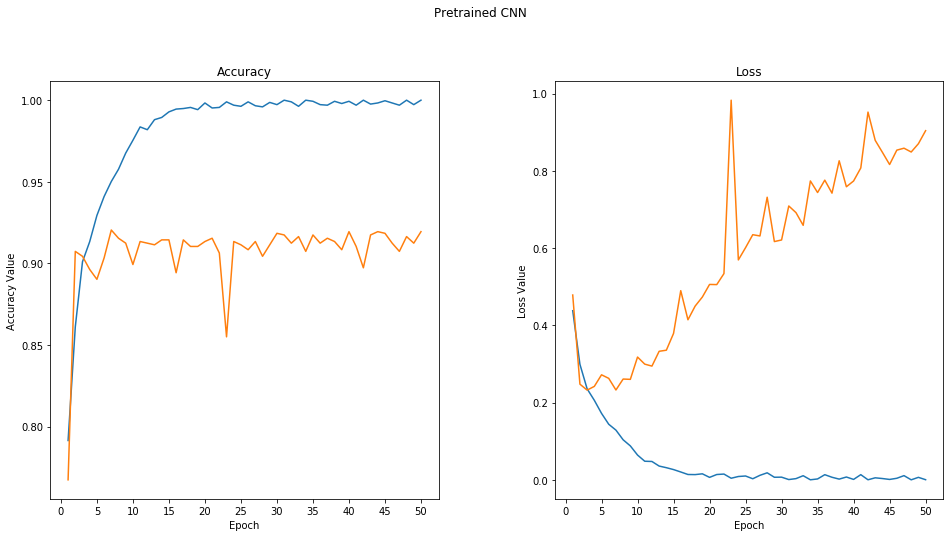

In [39]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
t = f.suptitle('Pretrained CNN ', fontsize = 12)
f.subplots_adjust(top=0.85, wspace=0.3)


epoch_list = list(range(1,51))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') 
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy') 
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')


ax2.plot(epoch_list, history.history['loss'], label='Train Loss') 
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss') 
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')


In [40]:
model.save('cats_dogs_tlearn_basic_cnn.h5')

Pretrained CNN model as a feature extractor with data augmentation

In [41]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [42]:
%store -r train_imgs
%store -r validation_imgs

In [43]:
train_datagen  = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                   rotation_range=50,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc,
                                    batch_size = 10)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc,
                                    batch_size = 3)

In [44]:
model = Sequential()

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 8192)              14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
__________________________________

In [45]:
history = model.fit(train_generator, steps_per_epoch=293,
                   epochs=50, validation_data=val_generator,
                   validation_steps=331, verbose=1)

Epoch 1/50
293/293 [==============================] - 276s 940ms/step - loss: 0.6857 - accuracy: 0.5644 - val_loss: 0.4331 - val_accuracy: 0.8177
Epoch 2/50
293/293 [==============================] - 245s 838ms/step - loss: 0.5336 - accuracy: 0.7369 - val_loss: 0.3279 - val_accuracy: 0.8600
Epoch 3/50
293/293 [==============================] - 290s 991ms/step - loss: 0.4777 - accuracy: 0.7777 - val_loss: 0.3007 - val_accuracy: 0.8771
Epoch 4/50
293/293 [==============================] - 252s 862ms/step - loss: 0.4450 - accuracy: 0.7911 - val_loss: 0.2767 - val_accuracy: 0.8781
Epoch 5/50
293/293 [==============================] - 253s 862ms/step - loss: 0.4076 - accuracy: 0.8012 - val_loss: 0.2730 - val_accuracy: 0.8802
Epoch 6/50
293/293 [==============================] - 305s 1s/step - loss: 0.4114 - accuracy: 0.8067 - val_loss: 0.2711 - val_accuracy: 0.8842
Epoch 7/50
293/293 [==============================] - 261s 892ms/step - loss: 0.3860 - accuracy: 0.8320 - val_loss: 0.2654 - va